In [31]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

path = 'C:\\Users\\moham\\Desktop\\Third Year Project\\Dataset\\'

columns = ['class','l_shoulder','r_shoulder','l_arm','r_arm','l_hip','r_hip','l_knee','r_knee']


# y82_test = pd.read_csv(path+'y82_testing.csv', header=None)
# y82_train = pd.read_csv(path+'y82_training.csv', header=None)
# L_test = pd.read_csv(path+'L_testing.csv', header=None)
# L_train = pd.read_csv(path+'y82_training.csv', header=None)

# df_train = pd.concat([y82_train, L_train])
# df_test = pd.concat([y82_test, L_test])

# df_train.columns = columns
# df_test.columns = columns


# # factorize 
# df_train['class'], classes = pd.factorize(df_train['class'])
# df_test['class'], classes = pd.factorize(df_test['class'])

# classes = list(classes)
# df_test



y82_test = pd.read_csv(path+'y82_testing.csv', header=None)
y82_train = pd.read_csv(path+'y82_training.csv', header=None)
L_test = pd.read_csv(path+'L_testing.csv', header=None)
L_train = pd.read_csv(path+'y82_training.csv', header=None)

df = pd.concat([y82_train, y82_test, L_test, L_train])

df.columns = columns

df['class'], classes = pd.factorize(df['class'])
classes = list(classes)

X = df.drop('class', axis=1)
y = df['class']


ValueError: Length of values (2) does not match length of index (1989)

# HYPER PARAM SEARCHING FOR RANDOM FORESTS
### Kinda slow

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = RandomForestClassifier()
param_grid = {'n_estimators' : np.arange(1, 8),
              'max_depth' : np.arange(1, 8),
              'min_samples_leaf': np.arange(1, 8)
            }


clf_gscv = GridSearchCV(clf, param_grid, cv=5)

#fit model to data
clf_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7])})

In [40]:
clf_gscv.best_params_

clf_best = RandomForestClassifier(max_depth=7, min_samples_leaf=1, n_estimators=7)

clf_best.fit(X_train, y_train)

pred = clf_best.predict(X_test)



{'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 7}

### Feature Importance

According to the random forest model, the most important feature are the knees, followed by the hips then arms then shoulders.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


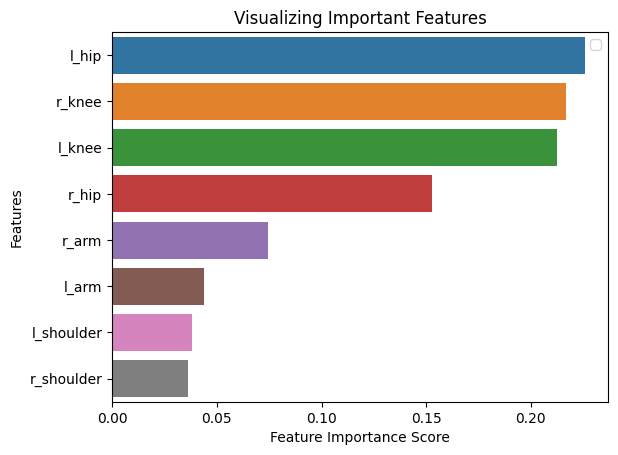

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.Series(clf.feature_importances_,index=columns[1:]).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()